In [89]:

import pandas as pd
import numpy as np
import geopy
from geopy.geocoders import Nominatim
import time
import math
from geopy.distance import geodesic

from sklearn import linear_model
from sklearn import model_selection



import tensorflow as tf


from haversine import haversine, Unit 


In [2]:
DataDirectory = "C:/Users/fabia/Documents/Python/Primer Trabajo/Entel Datathon/"
RawTrain = "train.csv"
RawTest = "test.csv"

Data1Dir = DataDirectory + RawTrain
Data2Dir = DataDirectory + RawTest 
RawData = pd.read_csv(Data1Dir)
RawDataTest = pd.read_csv(Data2Dir)


RawData

,ID,FECHA,LATITUD_ORIGEN,LONGITUD_ORIGEN,LATITUD_DESTINO,LONGITUD_DESTINO,DISTANCIA,TIEMPO
0,124092420,2021-07-28,-11.965070,-77.12269,-12.07020,-77.13524,14747.0,1775.0
1,124091219,2021-07-25,-12.155090,-76.97996,-12.07570,-76.91754,17171.0,1821.0
2,124091187,2021-07-25,-14.533770,-75.18460,-14.88630,-74.99414,58708.0,3842.0
3,124093495,2021-08-01,-5.201517,-80.64635,-5.38453,-80.62314,23611.0,1446.0
4,124092156,2021-07-27,-11.967470,-77.12508,-12.03500,-77.07444,14229.0,1974.0
...,...,...,...,...,...,...,...,...
1981,124091235,2021-07-25,-13.539960,-71.92628,-13.68660,-71.64474,37865.0,2939.0
1982,124090340,2021-07-23,-12.155460,-76.98013,-12.07700,-77.01974,14680.0,1547.0
1983,124090639,2021-07-23,-17.991940,-70.25442,-18.07740,-70.30064,12503.0,1367.0
1984,124090893,2021-07-24,-7.817392,-78.04557,-8.04841,-79.06494,188052.0,15035.0


In [7]:
DataDirectory = "C:/Users/fabia/Documents/Python/Primer Trabajo/Entel Datathon/"
RawTrain = "train.csv"
RawTest = "test.csv"

Data1Dir = DataDirectory + RawTrain
Data2Dir = DataDirectory + RawTest 





In [8]:

FirstryData = RawData.copy()
FirstryDataTest = RawDataTest.copy()


RawData = pd.read_csv(Data1Dir)
RawDataTest = pd.read_csv(Data2Dir)


In [ ]:

Origin_One= (-12.155830,-76.98000)
Destination_One = (-12.13913,-76.99422)

distance = geopy.distance.geodesic(Origin_One, Destination_One)

print(str(distance), " y ", haversine(Origin_One, Destination_One))






2.410073958891489 km  y  2.4161454018820696


In [9]:
# ML

capa= tf.keras.layers.Dense(units=1,input_shape=[1])
modelo= tf.keras.Sequential([capa])


In [10]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [11]:
print("Comenzando entrenamiento....")
historial = modelo.fit(FirstryData['DISTANCIA'],FirstryData['TIEMPO'],epochs=1000,verbose=False)
print("Modelo Entrenado!")

Comenzando entrenamiento....
Modelo Entrenado!


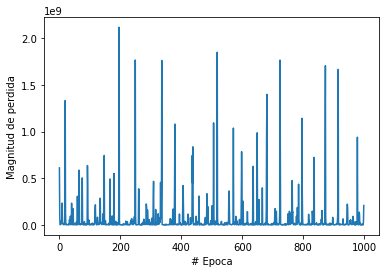

In [12]:
#ML
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [13]:
#ML
print("Variables internas del modelo:")
print(capa.get_weights())

Variables internas del modelo:
[array([[-0.11943328]], dtype=float32), array([591.7447], dtype=float32)]


In [14]:
#ML
print("Hagamos la prediccion:")
resultado = modelo.predict([])
print("El resultado es " + str(resultado))

Hagamos la prediccion:


KeyError: 'pop from an empty set'

In [16]:
FirstryDataTest['DISTANCE'] =  haversine((FirstryDataTest['LATITUD_ORIGEN'],FirstryDataTest['LONGITUD_ORIGEN']),(FirstryDataTest['LATITUD_DESTINO'],FirstryDataTest['LONGITUD_DESTINO']))

TypeError: cannot convert the series to <class 'float'>

In [15]:
haversine((-5.201517,-80.64635), (-5.38453,-80.62314))*1000

20511.763603058524

In [ ]:
haversine((FirstryDataTest['LATITUD_ORIGEN'],FirstryDataTest['LONGITUD_ORIGEN']),(FirstryDataTest['LATITUD_DESTINO'],FirstryDataTest['LONGITUD_DESTINO']))

In [ ]:
FirstryDataTest.head()

In [17]:
FirstryDataTest.describe()

,ID,LATITUD_ORIGEN,LONGITUD_ORIGEN,LATITUD_DESTINO,LONGITUD_DESTINO
count,8.520000e+02,852.000000,852.000000,852.000000,852.000000
mean,1.240908e+08,-11.155288,-76.578589,-11.138460,-76.560789
std,2.519643e+03,3.044135,2.540964,3.053074,2.565277
min,1.240350e+08,-18.019500,-81.264370,-18.077400,-81.306720
25%,1.240896e+08,-12.155830,-77.128658,-12.204548,-77.361910
50%,1.240909e+08,-11.991440,-77.012975,-12.029115,-77.007630
75%,1.240923e+08,-9.536713,-75.699210,-9.257240,-75.742840
max,1.240936e+08,-3.483565,-69.204390,-3.573830,-69.141940


In [26]:
type(FirstryDataTest['LATITUD_ORIGEN'])

pandas.core.series.Series

In [25]:
pd.float(FirstryDataTest['LATITUD_ORIGEN'])

AttributeError: module 'pandas' has no attribute 'float'

In [44]:
FirstryDataTest[['LATITUD_ORIGEN','LONGITUD_ORIGEN','LATITUD_ORIGEN','LONGITUD_DESTINO']] = FirstryDataTest[['LATITUD_ORIGEN','LONGITUD_ORIGEN','LATITUD_ORIGEN','LONGITUD_DESTINO']]. astype(float)
FirstryDataTest['DISTANCE'] = haversine((FirstryDataTest['LATITUD_ORIGEN'],FirstryDataTest['LONGITUD_ORIGEN']),(FirstryDataTest['LATITUD_DESTINO'],FirstryDataTest['LONGITUD_DESTINO']))

TypeError: cannot convert the series to <class 'float'>

In [46]:
FirstryDataTest['LATITUD_ORIGEN'] = FirstryDataTest['LATITUD_ORIGEN'].astype(float)

In [47]:
type(FirstryDataTest['LATITUD_ORIGEN'])

pandas.core.series.Series

In [48]:
pd.Series(FirstryData['LONGITUD_ORIGEN']).convert_objects(convert_numeric=True)

AttributeError: 'Series' object has no attribute 'convert_objects'

In [49]:
pd.to_numeric(FirstryDataTest['LONGITUD_ORIGEN'])

0     -74.99228
1     -78.51395
2     -77.11206
3     -76.97977
4     -77.04678
         ...   
847   -77.12262
848   -77.11545
849   -76.97981
850   -76.97981
851   -70.02085
Name: LONGITUD_ORIGEN, Length: 852, dtype: float64

In [51]:
FirstryDataTest.head(n=1)

,ID,FECHA,LATITUD_ORIGEN,LONGITUD_ORIGEN,LATITUD_DESTINO,LONGITUD_DESTINO
0,124089165,2021-07-20,-12.78105,-74.99228,-12.76703,-74.64612


In [ ]:
a = {"ID":FirstryDataTest['ID'],"Fabian":16}

df = pd.DataFrame(a,index=range(1,len(a)))
df

In [52]:
FirstryDataTest[['LATITUD_ORIGEN','LONGITUD_ORIGEN','LATITUD_ORIGEN','LONGITUD_DESTINO']] = FirstryDataTest[['LATITUD_ORIGEN','LONGITUD_ORIGEN','LATITUD_ORIGEN','LONGITUD_DESTINO']]. astype(float)
FirstryDataTest['DISTANCE'] = haversine((pd.to_numeric(FirstryDataTest['LATITUD_ORIGEN']),pd.to_numeric(FirstryDataTest['LONGITUD_ORIGEN'])),(pd.to_numeric(FirstryDataTest['LATITUD_DESTINO']),pd.to_numeric(FirstryDataTest['LONGITUD_DESTINO'])))

TypeError: cannot convert the series to <class 'float'>

In [66]:
DataRele =  FirstryDataTest.iloc[:,2:6].copy()

In [73]:
type(DataRele)

pandas.core.frame.DataFrame

In [71]:
DataRele['LATITUD_ORIGEN'] = DataRele['LATITUD_ORIGEN'].astype(float) 

In [72]:
type(DataRele['LATITUD_ORIGEN'])

pandas.core.series.Series

In [129]:
Data1Dir

RawDataTrain = pd.DataFrame(RawData).to_numpy()

RawDataTrain[:,2:6]




array([[-11.96507, -77.12269, -12.0702, -77.13524000000001],
       [-12.15509, -76.97996, -12.0757, -76.91754],
       [-14.53377, -75.1846, -14.8863, -74.99414],
       ...,
       [-17.99194, -70.25442, -18.0774, -70.30064],
       [-7.817392, -78.04557, -8.04841, -79.06494],
       [-12.15583, -76.98, -12.13913, -76.99422]], dtype=object)

In [133]:
modelo = linear_model.LinearRegression()  

x_train = RawDataTrain[:,2:6]
x_train = x_train.T

y_train = RawDataTrain[:,7]
y_train= y_train[None]



modelo.fit(x_train,y_train)





ValueError: Found input variables with inconsistent numbers of samples: [4, 1]

In [134]:

RawDataTrain.shape

x_train.shape

(4, 1986)

In [135]:
y_train.shape

(1, 1986)

In [123]:
y_train.T

array([1775.0, 1821.0, 3842.0, ..., 1367.0, 15035.0, 725.0], dtype=object)